In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/Topgun/dataset/Apple3.csv', encoding='utf-8')
sugar = df['SUGAR']

In [4]:
data_dict = { 'apple': [], 'imageName':[], 'label':[], 'path':[]}
   
for i in range(200):     #0-159
  for j in range(1, 7):
    filename = str(i+1)+'-'+str(j)+'.JPG'
    img_path = '/content/drive/Shareddrives/Topgun/dataset/train'+'/'+filename
    data_dict['path'].append(img_path)
    data_dict['imageName'].append(filename)
    data_dict['label'].append(sugar[i])
    data_dict['apple'].append(i+1)
  
apple_df = pd.DataFrame(data_dict)
print('\n<data frame>\n', apple_df)
    
apple_df.to_csv("train.csv", mode='w')


<data frame>
       apple  imageName label  \
0         1    1-1.JPG  HIGH   
1         1    1-2.JPG  HIGH   
2         1    1-3.JPG  HIGH   
3         1    1-4.JPG  HIGH   
4         1    1-5.JPG  HIGH   
...     ...        ...   ...   
1195    200  200-2.JPG   LOW   
1196    200  200-3.JPG   LOW   
1197    200  200-4.JPG   LOW   
1198    200  200-5.JPG   LOW   
1199    200  200-6.JPG   LOW   

                                                   path  
0     /content/drive/Shareddrives/Topgun/dataset/tra...  
1     /content/drive/Shareddrives/Topgun/dataset/tra...  
2     /content/drive/Shareddrives/Topgun/dataset/tra...  
3     /content/drive/Shareddrives/Topgun/dataset/tra...  
4     /content/drive/Shareddrives/Topgun/dataset/tra...  
...                                                 ...  
1195  /content/drive/Shareddrives/Topgun/dataset/tra...  
1196  /content/drive/Shareddrives/Topgun/dataset/tra...  
1197  /content/drive/Shareddrives/Topgun/dataset/tra...  
1198  /content/drive

In [5]:
pd.set_option('display.max_colwidth', 200)
data_df = apple_df
print('data_df shape:', data_df.shape)
data_df.head()

data_df shape: (1200, 4)


,apple,imageName,label,path
0,1,1-1.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-1.JPG
1,1,1-2.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-2.JPG
2,1,1-3.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-3.JPG
3,1,1-4.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-4.JPG
4,1,1-5.JPG,HIGH,/content/drive/Shareddrives/Topgun/dataset/train/1-5.JPG


In [6]:
print(data_df.shape)

data_df['label'].value_counts()

(1200, 4)


MEDIUM    546
LOW       336
HIGH      318
Name: label, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

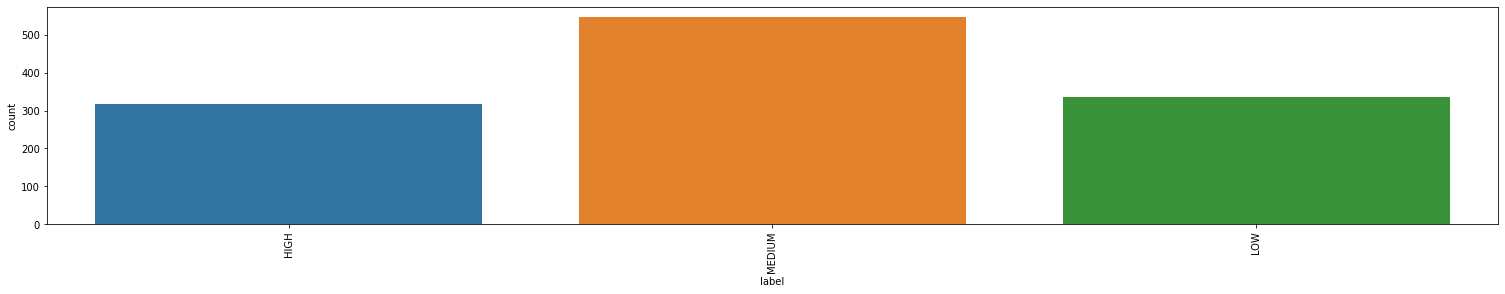

In [7]:
from ast import increment_lineno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(26, 4))

sns.countplot(data=data_df, x='label')
plt.xticks(rotation=90)

In [8]:
import cv2

def show_sugar_images(image_path_list, ncols=3, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        axs[i].imshow(image)
        axs[i].set_title(title)

In [9]:
import albumentations as A

imsi_augmentor = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.5),
    #A.CenterCrop(height=200, width=200, p=0.5),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),
    A.HueSaturationValue(hue_shift_limit=0.2, sat_shift_limit=0.2, val_shift_limit=0.2, p=0.5)
])


# image size 224x224 resize 적용. 
def show_sugar_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 

In [10]:
data_df['label'].value_counts().index.tolist()

['MEDIUM', 'LOW', 'HIGH']

In [11]:
# sugar_list = data_df['label'].value_counts().index.tolist()

# for iter_cnt, sugar in enumerate(sugar_list):
#     sugar_image_list = data_df[data_df['label']==sugar]['path'].iloc[:6].tolist()
#     show_sugar_images(sugar_image_list, ncols=6, title=sugar)
#     if iter_cnt == 8:
#         break

In [12]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size=0.2, stratify=data_df['label'], random_state=2021)
print(train_df.shape, test_df.shape)

(960, 4) (240, 4)


In [13]:
print(train_df['label'].value_counts()/train_df.shape[0])
print(test_df['label'].value_counts()/test_df.shape[0])

MEDIUM    0.455208
LOW       0.280208
HIGH      0.264583
Name: label, dtype: float64
MEDIUM    0.454167
LOW       0.279167
HIGH      0.266667
Name: label, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split

train_path = train_df['path'].values

train_label = pd.get_dummies(train_df['label']).values
 
tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, stratify=train_label, test_size=0.2, random_state=0)
print('training path shape:', tr_path.shape, 'validation path shape:', val_path.shape, 
      'training label shape:', tr_label.shape, 'validation label shape:', val_label.shape)

training path shape: (768,) validation path shape: (192,) training label shape: (768, 3) validation label shape: (192, 3)


In [ ]:
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

BATCH_SIZE = 64
IMAGE_SIZE = 224

class Sugar_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                 augmentor=None, shuffle=False, pre_func=None):
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data
        self.shuffle = shuffle
        if self.shuffle:
            #self.on_epoch_end()
            pass
    
    def __len__(self):
        return int(np.ceil(len(self.labels) / self.batch_size))
    

    def __getitem__(self, index):
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        

        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            image = cv2.resize(image, (self.image_size, self.image_size))
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch

    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass

In [ ]:
import albumentations as A

augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [ ]:
# Xception(Preprocess_input)

from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input
tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                      augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                       augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

tr_image_batch = next(iter(tr_ds))[0]
val_image_batch = next(iter(val_ds))[0]
print(tr_image_batch.shape, val_image_batch.shape)

print(tr_image_batch[:1])
print(val_image_batch[:1])

(64, 224, 224, 3) (64, 224, 224, 3)
[[[[ 0.5137255   0.6392157   0.7647059 ]
   [ 0.5294118   0.64705884  0.77254903]
   [ 0.49803925  0.62352943  0.7411765 ]
   ...
   [ 0.6         0.3411765   0.0196079 ]
   [ 0.5529412   0.39607847  0.24705887]
   [ 0.8980392   0.8666667   0.8745098 ]]

  [[ 0.41176474  0.54509807  0.67058825]
   [ 0.39607847  0.5294118   0.67058825]
   [ 0.32549024  0.45882356  0.6       ]
   ...
   [ 0.62352943  0.36470592  0.02745104]
   [ 0.67058825  0.52156866  0.4039216 ]
   [ 0.88235295  0.84313726  0.8745098 ]]

  [[ 0.38823533  0.52156866  0.6627451 ]
   [ 0.34901965  0.4666667   0.6156863 ]
   [ 0.38823533  0.5137255   0.6392157 ]
   ...
   [ 0.5294118   0.27843142 -0.04313725]
   [ 0.75686276  0.6156863   0.49803925]
   [ 0.85882354  0.84313726  0.8666667 ]]

  ...

  [[ 0.49803925  0.5137255   0.60784316]
   [ 0.3803922   0.3803922   0.47450984]
   [ 0.36470592  0.35686278  0.4666667 ]
   ...
   [ 0.827451    0.81960785  0.84313726]
   [ 0.8901961   0.85

In [ ]:
# import time

# tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=augmentor_light, shuffle=True, pre_func=xcp_preprocess_input)
# val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

# start = time.time()
# for value1, value2 in iter(tr_ds):
#     end = time.time()
#     print(end - start)
#     start = end

4.574078798294067
142.82031965255737


KeyboardInterrupt: ignored

In [ ]:
# Pretrained model
# Xception,ResNet50V2, EfficientNetB0, EfficientNetB1

from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1
from tensorflow.keras.applications import MobileNet
import tensorflow as tf


def create_model(model_type='xception', in_shape=(224, 224, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    
    return model

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Topgun/dataset/Apple3.csv', encoding='utf-8')
sugar = df['SUGAR']

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

import albumentations as A

IMAGE_DIR = '/content/drive/Shareddrives/Topgun/dataset/train' 

def make_sugar_dataframe(image_dir=IMAGE_DIR):
    paths = []
    label_gubuns = []
    for i in range(200):     #0-159
      for j in range(1, 7):
        filename = str(i+1)+'-'+str(j)+'.JPG'
        file_path = '/content/drive/Shareddrives/Topgun/dataset/train'+'/'+filename
        paths.append(file_path)
        label_gubuns.append(sugar[i])

    data_df = pd.DataFrame({'path':paths, 'label':label_gubuns})
    return data_df

def get_train_valid(train_df, valid_size=0.2, random_state=2021):
    train_path = train_df['path'].values
    train_label = pd.get_dummies(train_df['label']).values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    return tr_path, val_path, tr_label, val_label


BATCH_SIZE = 64
IMAGE_SIZE = 224


class Sugar_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                 augmentor=None, shuffle=False, pre_func=None):
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data
        self.shuffle = shuffle
        if self.shuffle:
            pass

    def __len__(self):
        return int(np.ceil(len(self.labels) / self.batch_size))
    
    def __getitem__(self, index):
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            image = cv2.resize(image, (self.image_size, self.image_size))
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch

    def on_epoch_end(self):
        if(self.shuffle):
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass
        
        
augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

In [ ]:
N_EPOCHS = 30

def train_model(model_type, train_df, initial_lr=0.001, augmentor=None, input_pre_func=None):
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor, shuffle=True, pre_func=input_pre_func)
    val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=input_pre_func)

    print('#######', model_type, ' generate and train ########')
    model = create_model(model_type=model_type)
    model.compile(optimizer=Adam(lr=initial_lr), loss='categorical_crossentropy', metrics=['accuracy'])

    rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
    
    ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
    
    history = model.fit(tr_ds, epochs=N_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/BATCH_SIZE)), 
                   validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/BATCH_SIZE)),
                   callbacks=([rlr_cb, ely_cb]), verbose=1)
    
    return model, history

IMAGE_DIR = '/content/drive/Shareddrives/Topgun/dataset/train' 

data_df = make_sugar_dataframe(image_dir=IMAGE_DIR)
train_df, test_df = train_test_split(data_df, test_size=0.4, stratify=data_df['label'], random_state=2021)
print(train_df.shape, test_df.shape)

(720, 2) (480, 2)


In [ ]:
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess_input

xception_model, xception_history = train_model(model_type='xception', train_df=train_df, initial_lr=0.0001, augmentor=augmentor_light,
                             input_pre_func=xcp_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
####### xception  generate and train ########
83683744/83683744 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
9/9 [==============================] - 1071s 119s/step - loss: 1.0807 - accuracy: 0.4514 - val_loss: 1.1262 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 2/30
9/9 [==============================] - 52s 6s/step - loss: 0.9227 - accuracy: 0.5747 - val_loss: 1.1353 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 3/30
9/9 [==============================] - 51s 6s/step - loss: 0.7596 - accuracy: 0.6285 - val_loss: 1.0836 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 4/30
9/9 [==============================] - 52s 6s/step - loss: 0.5559 - accuracy: 0.7778 - val_loss: 1.1873 - val_accuracy: 0.4306 - lr: 1.0000e-04
Epoch 5/30
9/9 [==============================] - 51s 6s/step - loss: 0.3735 - accuracy: 0.8594 - val_loss: 1.2682 - val_accuracy: 0.4722 - lr: 1.0000e-04
Epoch 6/30
9/9 [==============================] - ETA: 0s - loss: 0.2400 - accuracy: 0.9358
Epoch 6: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
9/9 [==============================] - 51s 6s/step -

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_df['gt_class'] = np.argmax(test_label, axis=1)

In [ ]:
test_df.head()

,path,label,gt_class
645,/content/drive/Shareddrives/Topgun/dataset/train/108-4.JPG,MEDIUM,2
121,/content/drive/Shareddrives/Topgun/dataset/train/21-2.JPG,MEDIUM,2
473,/content/drive/Shareddrives/Topgun/dataset/train/79-6.JPG,LOW,1
582,/content/drive/Shareddrives/Topgun/dataset/train/98-1.JPG,LOW,1
481,/content/drive/Shareddrives/Topgun/dataset/train/81-2.JPG,MEDIUM,2


In [ ]:
test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=xcp_preprocess_input)

xception_model.evaluate(test_ds)

8/8 [==============================] - 768s 109s/step - loss: 1.3182 - accuracy: 0.5354


[1.318227767944336, 0.5354166626930237]

In [ ]:
predict_result = xception_model.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis=1)
test_df['xcp_pred_class'] = predict_class

8/8 [==============================] - 34s 4s/step


In [ ]:
test_df.head()

,path,label,gt_class,xcp_pred_class
645,/content/drive/Shareddrives/Topgun/dataset/train/108-4.JPG,MEDIUM,2,2
121,/content/drive/Shareddrives/Topgun/dataset/train/21-2.JPG,MEDIUM,2,2
473,/content/drive/Shareddrives/Topgun/dataset/train/79-6.JPG,LOW,1,1
582,/content/drive/Shareddrives/Topgun/dataset/train/98-1.JPG,LOW,1,1
481,/content/drive/Shareddrives/Topgun/dataset/train/81-2.JPG,MEDIUM,2,1


In [ ]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

,path,label,gt_class,xcp_pred_class
481,/content/drive/Shareddrives/Topgun/dataset/train/81-2.JPG,MEDIUM,2,1
1199,/content/drive/Shareddrives/Topgun/dataset/train/200-6.JPG,LOW,1,2
387,/content/drive/Shareddrives/Topgun/dataset/train/65-4.JPG,MEDIUM,2,1
1152,/content/drive/Shareddrives/Topgun/dataset/train/193-1.JPG,HIGH,0,2
940,/content/drive/Shareddrives/Topgun/dataset/train/157-5.JPG,LOW,1,0
...,...,...,...,...
798,/content/drive/Shareddrives/Topgun/dataset/train/134-1.JPG,MEDIUM,2,0
904,/content/drive/Shareddrives/Topgun/dataset/train/151-5.JPG,LOW,1,2
394,/content/drive/Shareddrives/Topgun/dataset/train/66-5.JPG,MEDIUM,2,1
177,/content/drive/Shareddrives/Topgun/dataset/train/30-4.JPG,HIGH,0,2


In [ ]:
test_df[test_df['gt_class'] != test_df['xcp_pred_class']]['label'].value_counts()

MEDIUM    107
HIGH       72
LOW        44
Name: label, dtype: int64

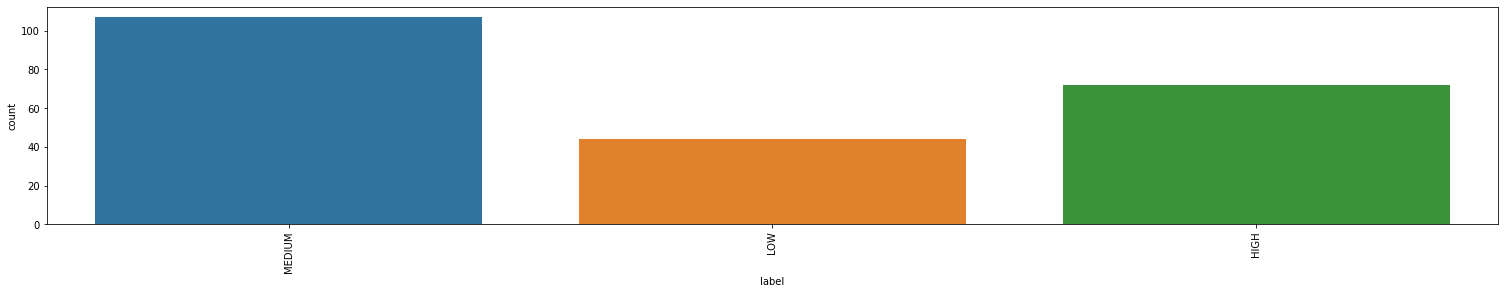

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(26, 4))
plt.xticks(rotation=90)

wrong_result_df = test_df[test_df['gt_class'] != test_df['xcp_pred_class']]

sns.countplot(data=wrong_result_df, x='label')

In [ ]:
def show_grid_images(image_path_list, augmentor=None, ncols=4, title=None):
    figure, axs = plt.subplots(figsize=(22, 4), nrows=1, ncols=ncols)
    for i in range(ncols):
        image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        if augmentor is not None:
            image = augmentor(image=image)['image']
        axs[i].imshow(image)
        axs[i].axis('off')
        axs[i].set_title(title) 

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_t1, effb0_history_t1 = train_model(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, augmentor=augmentor_light,
                             input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
####### efficientnetb0  generate and train ########
16705208/16705208 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
9/9 [==============================] - 66s 6s/step - loss: 1.0880 - accuracy: 0.4271 - val_loss: 1.0443 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 2/30
9/9 [==============================] - 51s 6s/step - loss: 0.9480 - accuracy: 0.5382 - val_loss: 1.0335 - val_accuracy: 0.4097 - lr: 1.0000e-04
Epoch 3/30
9/9 [==============================] - 51s 6s/step - loss: 0.8546 - accuracy: 0.6267 - val_loss: 1.0486 - val_accuracy: 0.4097 - lr: 1.0000e-04
Epoch 4/30
9/9 [==============================] - 51s 6s/step - loss: 0.7977 - accuracy: 0.6458 - val_loss: 1.0363 - val_accuracy: 0.4167 - lr: 1.0000e-04
Epoch 5/30
9/9 [==============================] - ETA: 0s - loss: 0.7311 - accuracy: 0.6979
Epoch 5: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.
9/9 [==============================] - 51s 6s/step - loss: 0.7311 - accuracy: 0.6979 - val_loss: 1.0579 - val_accuracy: 0.4514 - lr: 1.0000e-04
Epoch 6/30
9/9 [==============================] - 51s 6s/step - los

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_t1.evaluate(test_ds)

8/8 [==============================] - 33s 4s/step - loss: 0.9306 - accuracy: 0.5604


[0.9305852055549622, 0.5604166388511658]

In [ ]:
predict_result = effb0_model_t1.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis=1)
test_df['effb0_t1_pred_class'] = predict_class

8/8 [==============================] - 34s 4s/step


In [ ]:
test_df.head()

,path,label,gt_class,xcp_pred_class,effb0_t1_pred_class
645,/content/drive/Shareddrives/Topgun/dataset/train/108-4.JPG,MEDIUM,2,2,2
121,/content/drive/Shareddrives/Topgun/dataset/train/21-2.JPG,MEDIUM,2,2,2
473,/content/drive/Shareddrives/Topgun/dataset/train/79-6.JPG,LOW,1,1,2
582,/content/drive/Shareddrives/Topgun/dataset/train/98-1.JPG,LOW,1,1,1
481,/content/drive/Shareddrives/Topgun/dataset/train/81-2.JPG,MEDIUM,2,1,1


In [ ]:
test_df[test_df['gt_class'] != test_df['effb0_t1_pred_class']]['label'].value_counts()

HIGH      78
LOW       71
MEDIUM    62
Name: label, dtype: int64

Pretrained 모델 생성

*   ResNet50, Xception, EfficientNetB0, EfficientNetB1 등으로 Pretrained 모델을 생성할 수 있는 함수 생성.



---



In [ ]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1
from tensorflow.keras.applications import MobileNet
import tensorflow as tf

# sugar levels classes 종류는 3가지지

def create_model(model_type='xception', in_shape=(224, 224, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)
    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    
    return model

In [ ]:
N_EPOCHS = 30
BATCH_SIZE = 64
IMAGE_SIZE = 224

def train_model(model_type, train_df, initial_lr=0.001, augmentor=None, input_pre_func=None):
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor, shuffle=True, pre_func=input_pre_func)
    val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=input_pre_func)
    print('### train dataset shape:', next(iter(tr_ds))[0].shape)

    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', model_type, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=model_type)
    model.compile(optimizer=Adam(lr=initial_lr), loss='categorical_crossentropy', metrics=['accuracy'])

    # 3번 iteration내에 validation loss가 향상되지 않으면 learning rate을 기존 learning rate * 0.2로 줄임.  
    rlr_cb = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, mode='min', verbose=1)
    # 10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
    ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
    
    history = model.fit(tr_ds, epochs=N_EPOCHS, steps_per_epoch=tr_path.shape[0]//BATCH_SIZE, 
                   validation_data=val_ds, validation_steps=val_path.shape[0]//BATCH_SIZE,
                   callbacks=([rlr_cb, ely_cb]), verbose=1)
    
    return model, history


EfficientNetB0 기반에서 Augmentation 기법을 변화 시키면서 모델 학습, ReduceLROnPlateau 적용용

*   학습 데이터가 적을 경우 Augmentation이 너무 약할 경우, 과적합(Overfitting), Augmentation이 너무 강하거나 잘못 될 경우 과소적합(Underfitting)이 가능성이 있음.
*   이전에 적용한 좌우 반전보다는 더 다양한 기법을 적용하면서 모델 학습하고, 학습 데이터와 검증 데이터의 loss/metric 변화 추이 모니터링.



In [ ]:
augmentor_heavy_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.2),
    A.CenterCrop(height=90, width=90, p=0.2),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.ColorJitter(p=0.2),
    A.OneOf(
        [A.CoarseDropout(p=1, max_holes=26), 
         A.CLAHE(p=1),
         A.Blur(blur_limit=(10, 15), p=1)
        ], p=0.3)
])

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_aug01, effb0_history_aug01 = train_model(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, 
                                                     augmentor=augmentor_heavy_01, input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
### train dataset shape: (64, 224, 224, 3)
####### efficientnetb0  생성 및 학습 수행 ########


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
9/9 [==============================] - 71s 7s/step - loss: 1.1189 - accuracy: 0.3733 - val_loss: 1.0930 - val_accuracy: 0.4141 - lr: 1.0000e-04
Epoch 2/30
9/9 [==============================] - 57s 6s/step - loss: 1.0187 - accuracy: 0.4878 - val_loss: 1.0678 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 3/30
9/9 [==============================] - 56s 6s/step - loss: 0.9705 - accuracy: 0.5035 - val_loss: 1.0632 - val_accuracy: 0.3906 - lr: 1.0000e-04
Epoch 4/30
9/9 [==============================] - 56s 6s/step - loss: 0.9573 - accuracy: 0.5365 - val_loss: 1.0521 - val_accuracy: 0.4141 - lr: 1.0000e-04
Epoch 5/30
9/9 [==============================] - 57s 6s/step - loss: 0.9300 - accuracy: 0.5469 - val_loss: 1.0437 - val_accuracy: 0.4297 - lr: 1.0000e-04
Epoch 6/30
9/9 [==============================] - 56s 6s/step - loss: 0.9088 - accuracy: 0.5660 - val_loss: 1.0379 - val_accuracy: 0.4297 - lr: 1.0000e-04
Epoch 7/30
9/9 [==============================] - 56s 6s/step - loss: 

학습된 모델을 이용하여 테스트 데이터로 Evaluation 및 Prediction 수행.

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values
test_classes = np.argmax(test_label, axis=1)
test_df['gt_class'] = test_classes

test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_aug01.evaluate(test_ds)

8/8 [==============================] - 33s 4s/step - loss: 0.9367 - accuracy: 0.5813


[0.9367288947105408, 0.581250011920929]

In [ ]:
# 테스트 Dataset으로 개별 image들의 predict 수행. 
predict_result = effb0_model_aug01.predict(test_ds, steps=int(np.ceil(len(test_label)/BATCH_SIZE)))
predict_class = np.argmax(predict_result, axis=1)

test_df['effb0_aug01_pred_class'] = predict_class
print(test_df[test_df['gt_class'] != test_df['effb0_aug01_pred_class']]['label'].value_counts())

8/8 [==============================] - 34s 4s/step
HIGH      70
MEDIUM    69
LOW       62
Name: label, dtype: int64


다른 Augmentation을 적용

*   CenterCrop을 제외하고 probability를 약간 변경.


In [ ]:
augmentor_heavy_02 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.3),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.3),
    A.ColorJitter(p=0.3),
    A.OneOf(
        [A.CoarseDropout(p=0.3, max_holes=26), 
         A.CLAHE(p=0.3),
         A.Blur(blur_limit=(10, 15), p=0.3)
        ], p=0.3)
])

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_aug02, effb0_history_aug02 = train_model(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001,
                                               augmentor=augmentor_heavy_02, input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
### train dataset shape: (64, 224, 224, 3)
####### efficientnetb0  생성 및 학습 수행 ########
Epoch 1/30
9/9 [==============================] - 75s 7s/step - loss: 1.0900 - accuracy: 0.4427 - val_loss: 1.1293 - val_accuracy: 0.3828 - lr: 1.0000e-04
Epoch 2/30
9/9 [==============================] - 59s 7s/step - loss: 1.0199 - accuracy: 0.4844 - val_loss: 1.0847 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 3/30
9/9 [==============================] - 60s 7s/step - loss: 0.9763 - accuracy: 0.5312 - val_loss: 1.0597 - val_accuracy: 0.4062 - lr: 1.0000e-04
Epoch 4/30
9/9 [==============================] - 60s 7s/step - loss: 0.9214 - accuracy: 0.5434 - val_loss: 1.0664 - val_accuracy: 0.3906 - lr: 1.0000e-04
Epoch 5/30
9/9 [==============================] - 59s 7s/step - loss: 0.8657 - accuracy: 0.6024 - val_loss: 1.0642 - val_accuracy: 0.4141 - lr: 1.0000e-04
Epoch 6/30
9/9 [==========================

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input

effb0_model_aug02, effb0_history_aug02 = train_model(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001,
                                               augmentor=augmentor_heavy_02, input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
### train dataset shape: (64, 224, 224, 3)
####### efficientnetb0  생성 및 학습 수행 ########
Epoch 1/30
9/9 [==============================] - 75s 7s/step - loss: 1.1122 - accuracy: 0.3542 - val_loss: 1.2397 - val_accuracy: 0.2344 - lr: 1.0000e-04
Epoch 2/30
9/9 [==============================] - 59s 7s/step - loss: 1.0212 - accuracy: 0.4757 - val_loss: 1.2310 - val_accuracy: 0.2734 - lr: 1.0000e-04
Epoch 3/30
9/9 [==============================] - 60s 7s/step - loss: 0.9752 - accuracy: 0.5087 - val_loss: 1.2157 - val_accuracy: 0.2812 - lr: 1.0000e-04
Epoch 4/30
9/9 [==============================] - 60s 7s/step - loss: 0.9147 - accuracy: 0.5677 - val_loss: 1.1736 - val_accuracy: 0.3203 - lr: 1.0000e-04
Epoch 5/30
9/9 [==============================] - 59s 7s/step - loss: 0.8891 - accuracy: 0.5625 - val_loss: 1.1942 - val_accuracy: 0.3516 - lr: 1.0000e-04
Epoch 6/30
9/9 [==========================

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values


test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_aug02.evaluate(test_ds)

Learning Rate Scheduler를 Ramp Up and Step Decay 방식으로 변경경

*   최초는 1e-5에서 2회 Ramp up 단계를 거쳐서, Max인 1e-4까지 증가 시킴, 이후는 Step Decay 방시긍로 2회 마다 learning rate을 줄임


In [ ]:
# learning rate scheduler에 적용할 함수 선언. 내포 함수를 사용. 
def lrfn(epoch):
    # 내포 함수인 calc_fn()에서 사용되는 파라미터. 
    LR_START = 1e-5
    LR_MAX = 1e-4
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 2
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    # 반드시 내포 함수인 calc_fn(epoch)를 호출해야함. 
    return calc_fn(epoch)

In [ ]:
for i in range(30):
    print(lrfn(i+1))

5.5e-05
0.0001
0.0001
0.0001
0.0001
7.500000000000001e-05
7.500000000000001e-05
5.6250000000000005e-05
5.6250000000000005e-05
4.21875e-05
4.21875e-05
3.1640625e-05
3.1640625e-05
2.3730468750000002e-05
2.3730468750000002e-05
1.77978515625e-05
1.77978515625e-05
1.3348388671875e-05
1.3348388671875e-05
1.001129150390625e-05
1.001129150390625e-05
7.508468627929688e-06
7.508468627929688e-06
5.631351470947266e-06
5.631351470947266e-06
4.223513603210449e-06
4.223513603210449e-06
3.167635202407837e-06
3.167635202407837e-06
2.3757264018058777e-06


기존 train_model()에 RampUp and Step Decay를 Callback으로 반영할 수 있도록 train_model_with_aug_lr()로 함수 수정

*   Learnining Rate Scheduler등의 Callback 객체를 인자로 입력 받을 수 있도록 함수 수정.

In [ ]:
N_EPOCHS = 30
BATCH_SIZE = 64
IMAGE_SIZE = 224

def train_model_with_aug_lr(model_type, train_df, initial_lr=0.001, augmentor=None, callbacks_list=None, input_pre_func=None):
    
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=augmentor, shuffle=True, pre_func=input_pre_func)
    val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=input_pre_func)

    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', model_type, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=model_type)
    model.compile(optimizer=Adam(lr=initial_lr), loss='categorical_crossentropy', metrics=['accuracy'])
    # learning rate scheduler와 early stopping 을 함수 인자로 입력 받음. 
    history = model.fit(tr_ds, epochs=N_EPOCHS, steps_per_epoch=tr_path.shape[0]//BATCH_SIZE, 
                   validation_data=val_ds, validation_steps=val_path.shape[0]//BATCH_SIZE,
                   callbacks=(callbacks_list), verbose=1)
    
    return model, history

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input
import tensorflow as tf

# Learning Rate Scheduler(Ramp up and step down decay) 와 Early Stopping callback 생성. 
lr_cb = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
ely_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
# train_model에 인자로 넣을 Callback 객체의 리스트 생성. 
callbacks_list = [lr_cb, ely_cb]

augmentor_heavy_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.2),
    A.CenterCrop(height=90, width=90, p=0.2),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.ColorJitter(p=0.2),
    A.OneOf(
        [A.CoarseDropout(p=1, max_holes=26), 
         A.CLAHE(p=1),
         A.Blur(blur_limit=(10, 15), p=1)
        ], p=0.3)
])

augmentor_heavy_02 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.3),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.3),
    A.ColorJitter(p=0.3),
    A.OneOf(
        [A.CoarseDropout(p=0.3, max_holes=26), 
         A.CLAHE(p=0.3),
         A.Blur(blur_limit=(10, 15), p=0.3)
        ], p=0.3)
])

# augmentor_heavy_01을 ramp up and step decay 적용. 
effb0_model_lr01, effb0_history_lr01 = train_model_with_aug_lr(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, 
                                               augmentor=augmentor_heavy_01, callbacks_list=callbacks_list, input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
####### efficientnetb0  생성 및 학습 수행 ########

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/30
9/9 [==============================] - 71s 7s/step - loss: 1.1924 - accuracy: 0.2951 - val_loss: 1.0895 - val_accuracy: 0.3672 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/30
9/9 [==============================] - 56s 6s/step - loss: 1.1095 - accuracy: 0.3837 - val_loss: 1.0841 - val_accuracy: 0.3906 - lr: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/30
9/9 [==============================] - 56s 6s/step - loss: 1.0574 - accuracy: 0.4253 - val_loss: 1.0869 - val_accuracy: 0.3906 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/30
9/9 [==============================] - 56s 6s/step - loss: 0.9873 - accuracy: 0.5000 - val_loss: 1.0367 - val_accuracy: 0.36

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_lr01.evaluate(test_ds)

8/8 [==============================] - 33s 4s/step - loss: 0.9345 - accuracy: 0.5729


[0.9345054030418396, 0.5729166865348816]

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input
import tensorflow as tf

# augmentor_heavy_02를 ramp up and step decay 적용. 
effb0_model_lr02, effb0_history_lr02 = train_model_with_aug_lr(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, 
                                               augmentor=augmentor_heavy_02, callbacks_list=callbacks_list, input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
####### efficientnetb0  생성 및 학습 수행 ########

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/30
9/9 [==============================] - 74s 7s/step - loss: 1.2127 - accuracy: 0.2969 - val_loss: 1.1620 - val_accuracy: 0.3672 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/30
9/9 [==============================] - 59s 7s/step - loss: 1.1216 - accuracy: 0.3889 - val_loss: 1.1093 - val_accuracy: 0.3594 - lr: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/30
9/9 [==============================] - 59s 7s/step - loss: 1.0520 - accuracy: 0.4497 - val_loss: 1.1052 - val_accuracy: 0.3750 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/30
9/9 [==============================] - 59s 7s/step - loss: 1.0047 - accuracy: 0.4983 - val_loss: 1.0520 - val_accuracy: 0.38

In [ ]:
test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_lr02.evaluate(test_ds)

8/8 [==============================] - 33s 4s/step - loss: 0.8965 - accuracy: 0.5833


[0.8965483903884888, 0.5833333134651184]

Pretrained 모델의 Fine Tuning 적용용

*   Fine tuning으로 1차 dense layer 부터 학습 적용, 2차 전체 Layer 학습 적용용
*   EfficientNet의 경우는 Batch Normalization은 학습하지 않도록 설정.



In [ ]:
model_imsi =create_model(model_type='efficientnetb0')
model_imsi.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_6 (Rescaling)        (None, 224, 224, 3)  0           ['input_8[0][0]']                
                                                                                                  
 normalization_6 (Normalization  (None, 224, 224, 3)  7          ['rescaling_6[0][0]']            
 )                                                                                                
                                                                                            

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

N_EPOCHS = 30
BATCH_SIZE = 64
IMAGE_SIZE = 224

def train_model_with_ft(model_type, train_df, initial_lr=0.0001, augmentor=None, callbacks_list=None, input_pre_func=None):
    
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)

    tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=augmentor, shuffle=True, pre_func=input_pre_func)
    val_ds = Sugar_Dataset(val_path, val_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=input_pre_func)

    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', model_type, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=model_type)
    
    # Feature Extractor layer들을 모두 Freeze
    for layer in model.layers[:-4]:
        layer.trainable = False
    
    model.compile(optimizer=Adam(lr=initial_lr), loss='categorical_crossentropy', metrics=['accuracy'])
    
    #10번 iteration내에 validation loss가 향상되지 않으면 더 이상 학습하지 않고 종료
    ely_cb = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
    #cosine_decay = tf.keras.experimental.CosineDecay(initial_learning_rate=0.001, decay_steps=300)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
    
    ### Feature Extractor layer들은 학습하지 않고 Dense Layer만 일차 학습. 
    print('##### Feature Extractor freeze후 Dense layer 학습 시작 ##### ')
    history = model.fit(tr_ds, epochs=15, steps_per_epoch=int(np.ceil(tr_path.shape[0]/BATCH_SIZE)), 
                  validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/BATCH_SIZE)),
                  callbacks=(callbacks_list), verbose=1)
    # efficientNet의 일부만 trainable 가능하게 설정. 특히 BatchNormalization layer는 trainable False로 유지. 
    # https://keras.io/examples/vision/image_classification_efficientnet_fine_tuning/
    #for layer in model.layers[-20:]:
    for layer in model.layers:
        if not isinstance(layer, layers.BatchNormalization):
            layer.trainable = True
    
    print('##### 전체 Layer Unfreeze 후 학습 시작 ##### ')
    history = model.fit(tr_ds, epochs=25, steps_per_epoch=int(np.ceil(tr_path.shape[0]/BATCH_SIZE)), 
                  validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/BATCH_SIZE)),
                  callbacks=(callbacks_list), verbose=1)

    return model, history

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input
import tensorflow as tf

# learning rate scheduler에 적용할 함수 선언. 내포 함수를 사용. 
def lrfn(epoch):
    # 내포 함수인 calc_fn()에서 사용되는 파라미터. 
    LR_START = 1e-5
    LR_MAX = 1e-4
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    # 반드시 내포 함수인 calc_fn(epoch)를 호출해야함. 
    return calc_fn(epoch)

# Learning Rate Scheduler(Ramp up and step down decay) 와 Early Stopping callback 생성. 
lr_cb = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
ely_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)
# train_model에 인자로 넣을 Callback 객체의 리스트 생성. 
callbacks_list = [lr_cb, ely_cb]


augmentor_light_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
])

augmentor_light_02 = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.2, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.ColorJitter(p=0.2)
])

augmentor_heavy_01 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.2),
    A.CenterCrop(height=90, width=90, p=0.2),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.ColorJitter(p=0.2),
    A.OneOf(
        [A.CoarseDropout(p=1, max_holes=26), 
         A.CLAHE(p=1),
         A.Blur(blur_limit=(10, 15), p=1)
        ], p=0.3)
])

augmentor_heavy_02 = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(p=0.3),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.3),
    A.ColorJitter(p=0.3),
    A.OneOf(
        [A.CoarseDropout(p=0.3, max_holes=26), 
         A.CLAHE(p=0.3),
         A.Blur(blur_limit=(10, 15), p=0.3)
        ], p=0.3)
])

In [ ]:
effb0_model_ft01, effb0_history_ft01 = train_model_with_ft(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, 
                                            augmentor=augmentor_heavy_01, callbacks_list=callbacks_list, input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
####### efficientnetb0  생성 및 학습 수행 ########
##### Feature Extractor freeze후 Dense layer 학습 시작 ##### 

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/15
9/9 [==============================] - 68s 7s/step - loss: 1.1788 - accuracy: 0.3194 - val_loss: 1.1099 - val_accuracy: 0.3333 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/15
9/9 [==============================] - 55s 6s/step - loss: 1.1421 - accuracy: 0.4028 - val_loss: 1.0994 - val_accuracy: 0.4444 - lr: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/15
9/9 [==============================] - 56s 6s/step - loss: 1.1032 - accuracy: 0.4410 - val_loss: 1.0196 - val_accuracy: 0.4306 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/15
9/9 [==============================] - 56s 6s/step - loss: 1.0533 -

In [ ]:
test_path = test_df['path'].values
test_label = pd.get_dummies(test_df['label']).values

test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_ft01.evaluate(test_ds)

8/8 [==============================] - 34s 4s/step - loss: 0.9441 - accuracy: 0.5292


[0.944101870059967, 0.5291666388511658]

lighter한 Augmentation 적용용

In [ ]:
effb0_model_ft02, effb0_history_ft02 = train_model_with_ft(model_type='efficientnetb0', train_df=train_df, initial_lr=0.0001, 
                                            augmentor=augmentor_light_02, callbacks_list=callbacks_list, input_pre_func=eff_preprocess_input)

tr_path shape: (576,) tr_label shape: (576, 3) val_path shape: (144,) val_label shape: (144, 3)
####### efficientnetb0  생성 및 학습 수행 ########
##### Feature Extractor freeze후 Dense layer 학습 시작 ##### 

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/15
9/9 [==============================] - 68s 7s/step - loss: 1.1769 - accuracy: 0.3611 - val_loss: 1.0922 - val_accuracy: 0.3333 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/15
9/9 [==============================] - 56s 6s/step - loss: 1.1141 - accuracy: 0.3941 - val_loss: 1.0834 - val_accuracy: 0.4444 - lr: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/15
9/9 [==============================] - 55s 6s/step - loss: 1.0720 - accuracy: 0.4688 - val_loss: 0.9986 - val_accuracy: 0.4653 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/15
9/9 [==============================] - 55s 6s/step - loss: 1.0171 -

In [ ]:
test_ds = Sugar_Dataset(test_path, test_label, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=eff_preprocess_input)

effb0_model_ft02.evaluate(test_ds)

8/8 [==============================] - 34s 4s/step - loss: 0.9262 - accuracy: 0.5479


[0.9262027144432068, 0.5479166507720947]

지금까지 변경 테스트한 여러 환경들을 손쉽게 테스트 해볼 수 있도록 함수 재구성

*   Config 클래스를 만들어서 여기에 테스트에 필요한 인자들을 모두 설정 할 수 있도록 함.
*   train_model()인자로 Config를 입력 받아서 이를 기반으로 학습을 수행할 수 있도록 변경

In [14]:
class Config:
    MODEL_TYPE = 'effcientnetb0'
    IMAGE_SIZE = 224
    BATCH_SIZE = 64
    N_EPOCHS = 30 # fine tuning이 아닐 경우 전체 수행 epoch 횟수
    IS_FINE_TUNING = False # Fine Tuning 여부
    FIRST_EPOCHS = 15 # fine tuning 일 경우 첫번째 epoch 횟수
    SECOND_EPOCHS = 25 # fine tuning 일 경우 두번째 epoch 횟수
    FIRST_CALLBACKS = None # 모델 train시 적용될 callback 객체들의 List
    SECOND_CALLBACKS = None # 만일 Fine tuning 시 첫번째 학습과 두번째 학습의 Learning rate scheduler가 서로 다를 경우 사용. 
    AUGMENTOR = None
    PRE_FUNC = None
    INITIAL_LR = 0.0001 # Optimizer에 적용될 최초 Learning rate
    DEBUG = False

아래는 기존에 사용한 라이브러리 함수 그대로 가져온 것것

In [15]:
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam , RMSprop 
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau , EarlyStopping , ModelCheckpoint , LearningRateScheduler

from tensorflow.keras.applications import Xception, ResNet50V2, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3
from tensorflow.keras.applications import MobileNet
import tensorflow as tf

# LOW MEDIUM HIGH : Classes 3개개
N_CLASSES = 3

def create_model(model_type='xception', in_shape=(224, 224, 3), n_classes=3):
    input_tensor = Input(shape=in_shape)

    if model_type == 'resnet50v2':
        base_model = tf.keras.applications.ResNet50V2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'xception':
        base_model = tf.keras.applications.Xception(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb0':
        base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb1':
        base_model = tf.keras.applications.EfficientNetB1(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb2':
        base_model = tf.keras.applications.EfficientNetB2(include_top=False, weights='imagenet', input_tensor=input_tensor)
    elif model_type == 'efficientnetb3':
        base_model = tf.keras.applications.EfficientNetB3(include_top=False, weights='imagenet', input_tensor=input_tensor)
        
    x = base_model.output  
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.5)(x)    
    preds = Dense(units=n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=preds)
    
    return model

In [16]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
import sklearn 
import cv2

import albumentations as A

IMAGE_DIR = '/content/drive/Shareddrives/Topgun/dataset/train' 

def make_sugar_dataframe(image_dir=IMAGE_DIR):
    paths = []
    label_gubuns = []
    for i in range(200):     #0-159
      for j in range(1, 7):
        filename = str(i+1)+'-'+str(j)+'.JPG'
        file_path = '/content/drive/Shareddrives/Topgun/dataset/train'+'/'+filename
        paths.append(file_path)
        label_gubuns.append(sugar[i])

    data_df = pd.DataFrame({'path':paths, 'label':label_gubuns})
    return data_df

def get_train_valid(train_df, valid_size=0.2, random_state=2021):
    train_path = train_df['path'].values
    train_label = pd.get_dummies(train_df['label']).values
    
    tr_path, val_path, tr_label, val_label = train_test_split(train_path, train_label, test_size=valid_size, random_state=random_state)
    print('tr_path shape:', tr_path.shape, 'tr_label shape:', tr_label.shape, 'val_path shape:', val_path.shape, 'val_label shape:', val_label.shape)
    return tr_path, val_path, tr_label, val_label

    
BATCH_SIZE = 64
IMAGE_SIZE = 224


class Sugar_Dataset(Sequence):
    def __init__(self, image_filenames, labels, image_size=IMAGE_SIZE, batch_size=BATCH_SIZE, 
                 augmentor=None, shuffle=False, pre_func=None):
        '''
        파라미터 설명
        image_filenames: opencv로 image를 로드할 파일의 절대 경로들
        labels: 해당 image의 label들
        batch_size: __getitem__(self, index) 호출 시 마다 가져올 데이터 batch 건수
        augmentor: albumentations 객체
        shuffle: 학습 데이터의 경우 epoch 종료시마다 데이터를 섞을지 여부
        '''
        # 객체 생성 인자로 들어온 값을 객체 내부 변수로 할당. 
        self.image_filenames = image_filenames
        self.labels = labels
        self.image_size = image_size
        self.batch_size = batch_size
        self.augmentor = augmentor
        self.pre_func = pre_func
        # train data의 경우 
        self.shuffle = shuffle
        if self.shuffle:
            # 객체 생성시에 한번 데이터를 섞음. 
            #self.on_epoch_end()
            pass
    
    # Sequence를 상속받은 Dataset은 batch_size 단위로 입력된 데이터를 처리함. 
    # __len__()은 전체 데이터 건수가 주어졌을 때 batch_size단위로 몇번 데이터를 반환하는지 나타남
    def __len__(self):
        # batch_size단위로 데이터를 몇번 가져와야하는지 계산하기 위해 전체 데이터 건수를 batch_size로 나누되, 정수로 정확히 나눠지지 않을 경우 1회를 더한다. 
        return int(np.ceil(len(self.labels) / self.batch_size))
    
    # batch_size 단위로 image_array, label_array 데이터를 가져와서 변환한 뒤 다시 반환함
    # 인자로 몇번째 batch 인지를 나타내는 index를 입력하면 해당 순서에 해당하는 batch_size 만큼의 데이타를 가공하여 반환
    # batch_size 갯수만큼 변환된 image_array와 label_array 반환. 
    def __getitem__(self, index):
        # index는 몇번째 batch인지를 나타냄. 
        # batch_size만큼 순차적으로 데이터를 가져오려면 array에서 index*self.batch_size:(index+1)*self.batch_size 만큼의 연속 데이터를 가져오면 됨
        image_name_batch = self.image_filenames[index*self.batch_size:(index+1)*self.batch_size]
        if self.labels is not None:
            label_batch = self.labels[index*self.batch_size:(index+1)*self.batch_size]
        
        # 만일 객체 생성 인자로 albumentation으로 만든 augmentor가 주어진다면 아래와 같이 augmentor를 이용하여 image 변환
        # albumentations은 개별 image만 변환할 수 있으므로 batch_size만큼 할당된 image_name_batch를 한 건씩 iteration하면서 변환 수행. 
        # image_batch 배열은 float32 로 설정. 
        image_batch = np.zeros((image_name_batch.shape[0], self.image_size, self.image_size, 3), dtype='float32')
        
        # batch_size에 담긴 건수만큼 iteration 하면서 opencv image load -> image augmentation 변환(augmentor가 not None일 경우)-> image_batch에 담음. 
        for image_index in range(image_name_batch.shape[0]):
            image = cv2.cvtColor(cv2.imread(image_name_batch[image_index]), cv2.COLOR_BGR2RGB)
            if self.augmentor is not None:
                image = self.augmentor(image=image)['image']
            #crop 시 잘린 이미지가 원본 이미지와 다르게 되므로 augmentation 적용 후 resize() 적용. 
            image = cv2.resize(image, (self.image_size, self.image_size))
            # 만일 preprocessing_input이 pre_func인자로 들어오면 이를 이용하여 scaling 적용. 
            if self.pre_func is not None:
                image = self.pre_func(image)
                
            image_batch[image_index] = image
        
        return image_batch, label_batch
    
    # epoch가 한번 수행이 완료 될 때마다 모델의 fit()에서 호출됨. 
    def on_epoch_end(self):
        if(self.shuffle):
            #print('epoch end')
            # 전체 image 파일의 위치와 label를 쌍을 맞춰서 섞어준다. scikt learn의 utils.shuffle에서 해당 기능 제공
            self.image_filenames, self.labels = sklearn.utils.shuffle(self.image_filenames, self.labels)
        else:
            pass
        
        
augmentor_light = A.Compose([
    A.HorizontalFlip(p=0.5),
])

train_model 함수를 Config 클래스 값을 인자로 입력 받을 수 있도록 변경경

In [30]:
def train_model(train_df, config=Config):
    # 학습과 검증 데이터 이미지/레이블로 분리하고 학습/검증 Dataset 생성. 
    tr_path, val_path, tr_label, val_label = get_train_valid(train_df, valid_size=0.2, random_state=2021)
    
    tr_ds = Sugar_Dataset(tr_path, tr_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=config.AUGMENTOR, shuffle=True, pre_func=config.PRE_FUNC)
    val_ds = Sugar_Dataset(val_path, val_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                          augmentor=None, shuffle=False, pre_func=config.PRE_FUNC)
    if config.DEBUG:
        tr_image_batch = next(iter(tr_ds))[0]
        val_image_batch = next(iter(val_ds))[0]
        print(tr_image_batch.shape, val_image_batch.shape)
        print(tr_image_batch[0], val_image_batch[0])
        
    # model_type인자로 들어온 모델 생성. optimizer Adam적용. 
    print('#######', config.MODEL_TYPE, ' 생성 및 학습 수행 ########')
    model = create_model(model_type=config.MODEL_TYPE, in_shape=(config.IMAGE_SIZE, config.IMAGE_SIZE, 3), n_classes=3)
    model.compile(optimizer=Adam(lr=config.INITIAL_LR), loss='categorical_crossentropy', metrics=['accuracy'])
    
    # 만일 Fine tuning 일 경우 아래 로직 적용. 
    if config.IS_FINE_TUNING:
        print('####### Fine tuning 학습을 시작합니다. ########')
        # 첫번째 Fine Tuning. Feature Extractor를 제외한 classification layer를 학습.(Feature Extractor layer들을 trainable=False 설정)
        for layer in model.layers[:-4]:
            layer.trainable = False
        
        print('####### Classification Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.FIRST_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
        # # 두번째, 전체 Layer를 학습. 전체 layer를 trainable=True로 수정. Batch Normalization layer는 fine tuning시 계속 trainable=False 설정. 
        # for layer in model.layers:
        #     print(layer)
        #     if not isinstance(layer, layers.BatchNormalization):
        #         layer.trainable = True
        
        print('####### 전체 Layer들의 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.SECOND_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                           validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                           callbacks=(config.SECOND_CALLBACKS), verbose=1)
    
    # Fine Tuning이 아닐 경우 
    else:
        print('####### 학습을 시작합니다. ########')
        history = model.fit(tr_ds, epochs=config.N_EPOCHS, steps_per_epoch=int(np.ceil(tr_path.shape[0]/config.BATCH_SIZE)), 
                       validation_data=val_ds, validation_steps=int(np.ceil(val_path.shape[0]/config.BATCH_SIZE)),
                       callbacks=(config.FIRST_CALLBACKS), verbose=1)
        
    return model, history

EfficientNetB1 모델 학습 및 성능 평가


*   Config 클래스의 내부 변수값으로 할당 될 수 있도록 Learning Rate Scheduler에 적용될 함수, Callback 객체, Augmentation 객체들을 생성성
*   EfficientNetB1의 경우 240X240 이미지 크기로 최적화 되었으므로 이에 맞게 Config 값 설정.

In [31]:
from tensorflow.keras.applications.efficientnet import preprocess_input as eff_preprocess_input
import tensorflow as tf

# learning rate scheduler에 적용할 함수 선언. 
def lrfn_01(epoch):
    LR_START = 1e-5
    LR_MAX = 1e-4
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

def lrfn_02(epoch):
    LR_START = 1e-6
    LR_MAX = 2e-5
    LR_RAMPUP_EPOCHS = 2
    LR_SUSTAIN_EPOCHS = 1
    LR_STEP_DECAY = 0.75
    
    def calc_fn(epoch):
        if epoch < LR_RAMPUP_EPOCHS:
            lr = (LR_MAX - LR_START) / LR_RAMPUP_EPOCHS * epoch + LR_START
        elif epoch < LR_RAMPUP_EPOCHS + LR_SUSTAIN_EPOCHS:
            lr = LR_MAX
        else:
            lr = LR_MAX * LR_STEP_DECAY**((epoch - LR_RAMPUP_EPOCHS - LR_SUSTAIN_EPOCHS)//2)
        return lr
    
    return calc_fn(epoch)

# Config에 입력할 callback 생성. 
lr01_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_01, verbose=1)
lr02_cb = tf.keras.callbacks.LearningRateScheduler(lrfn_02, verbose=1)
ely_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# Augmentor 생성. 

augmentor_light_02 = A.Compose([
    A.HorizontalFlip(p=0.3),
    A.ShiftScaleRotate(scale_limit=(0.7, 0.9), p=0.2, rotate_limit=30),
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.2),
    A.ColorJitter(p=0.2)
])

# Config 생성. 
class Config:
    MODEL_TYPE = 'efficientnetb1'
    IMAGE_SIZE = 240
    BATCH_SIZE = 64
    N_EPOCHS = 30 # fine tuning이 아닐 경우 전체 수행 epoch 횟수
    IS_FINE_TUNING = True
    FIRST_EPOCHS = 15 # fine tuning 일 경우 첫번째 epoch 횟수
    SECOND_EPOCHS = 15 # fine tuning 일 경우 두번째 epoch 횟수
    FIRST_CALLBACKS = [lr01_cb, ely_cb] #모델 train시 적용될 callback 객체 리스트
    SECOND_CALLBACKS = [lr02_cb, ely_cb] #만일 Fine tuning 시 첫번째 학습과 두번째 학습의 Learning rate scheduler가 서로 다를 경우 사용. 
    AUGMENTOR = augmentor_light_02
    PRE_FUNC = eff_preprocess_input
    INITIAL_LR = 0.0001
    DEBUG = False

EfficientNetB1 모델 학습

In [32]:
eff1_model, history = train_model(train_df, config=Config)

tr_path shape: (768,) tr_label shape: (768, 3) val_path shape: (192,) val_label shape: (192, 3)
####### efficientnetb1  생성 및 학습 수행 ########
####### Fine tuning 학습을 시작합니다. ########
####### Classification Layer들의 학습을 시작합니다. ########

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/15
12/12 [==============================] - 95s 7s/step - loss: 1.1177 - accuracy: 0.3672 - val_loss: 1.1058 - val_accuracy: 0.3333 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 5.5e-05.
Epoch 2/15
12/12 [==============================] - 75s 6s/step - loss: 1.0872 - accuracy: 0.4271 - val_loss: 1.0499 - val_accuracy: 0.4583 - lr: 5.5000e-05

Epoch 3: LearningRateScheduler setting learning rate to 0.0001.
Epoch 3/15
12/12 [==============================] - 74s 6s/step - loss: 1.0023 - accuracy: 0.4831 - val_loss: 1.0106 - val_accuracy: 0.5104 - lr: 1.0000e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.0001.
Epoch 4/15
12/12 [====================

In [33]:
def evaluate_model(model, test_df, config=Config):
    test_path = test_df['path'].values
    test_label = pd.get_dummies(test_df['label']).values
    test_ds = Sugar_Dataset(test_path, test_label, image_size=config.IMAGE_SIZE, batch_size=config.BATCH_SIZE, 
                        augmentor=None, shuffle=False, pre_func=config.PRE_FUNC)

    evaluation_result = model.evaluate(test_ds)
    print('evaluation_result:', evaluation_result)
    
    return model, evaluation_result

model, evaluation_result = evaluate_model(model=eff1_model, test_df=test_df, config=Config)

4/4 [==============================] - 17s 4s/step - loss: 0.9283 - accuracy: 0.5667
evaluation_result: [0.9282916784286499, 0.5666666626930237]
